In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta de 4ª ordem

In [2]:
def RK4(a,b,h,r0,f):
  tpoints = np.arange(a,b,h)
  rpoints = []

  for t in tpoints:
    rpoints.append(r0)
    k1 = h*f(r0,t)
    k2 = h*f(r0 + 0.5*k1,t + 0.5*h)
    k3 = h*f(r0 + 0.5*k2,t + 0.5*h)
    k4 = h*f(r0+k3,t+h)
    r0 += (k1+2*k2+2*k3+k4)/6
  return tpoints, rpoints

# RC

In [3]:
def Vin(t):
  return (Vpp/2)*np.sin(2*np.pi*freq*t)

def RCcircuit(Vout,t):
  return 1/(R*C)*(Vin(t) - Vout)

# RC - Sinal temporal

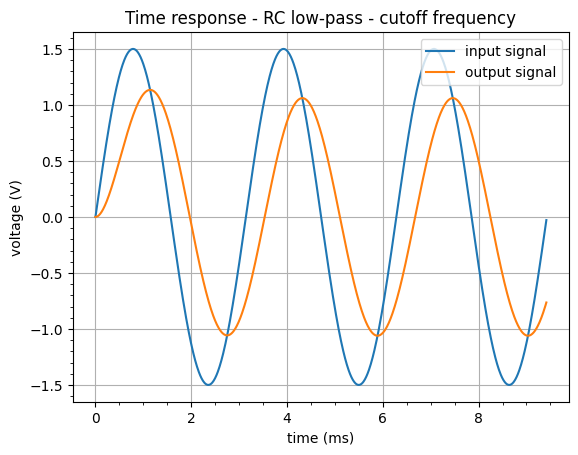

In [8]:
Vpp = 3
R = 500  #ohms
C = 1e-6 #faraday
freq = 1/(2*np.pi*R*C)
a = 0    #s
b = 3/freq  #s
N = 1000
h = (b - a)/N

Vinpoints = []
tpoints = np.arange(a,b,h)

for t in (tpoints):
  Vinpoints.append(Vin(t))

rescaledt = [1000*t for t in tpoints]

plt.plot(rescaledt, Vinpoints, label='input signal')

#####################################################################################################################################################################

tpoints, Voutpoints = RK4(a,b,h,0,RCcircuit)

plt.title('Time response - RC low-pass - cutoff frequency')
plt.xlabel('time (ms)')
plt.ylabel('voltage (V)')
plt.grid()
plt.minorticks_on()
plt.plot(rescaledt, Voutpoints, label='output signal')
plt.legend(loc='upper right')
plt.savefig('RC-passa-baixa-respt-cof.png', format='png')
plt.show()

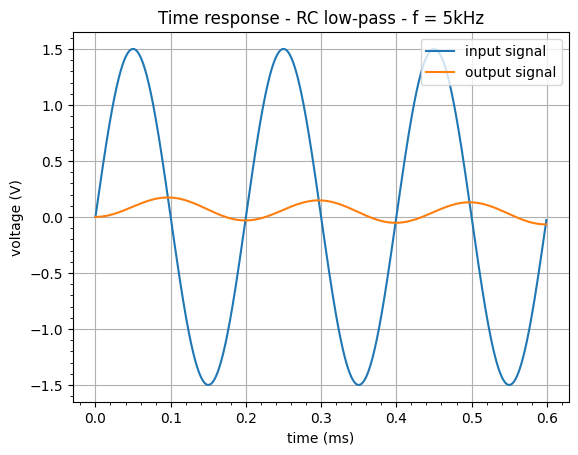

In [9]:
Vpp = 3
R = 500  #ohms
C = 1e-6 #faraday
freq = 5000
a = 0    #s
b = 3/freq  #s
N = 1000
h = (b - a)/N

Vinpoints = []
tpoints = np.arange(a,b,h)

for t in (tpoints):
  Vinpoints.append(Vin(t))

rescaledt = [1000*t for t in tpoints]

plt.plot(rescaledt, Vinpoints, label='input signal')

#####################################################################################################################################################################

tpoints, Voutpoints = RK4(a,b,h,0,RCcircuit)

plt.title('Time response - RC low-pass - f = 5kHz')
plt.xlabel('time (ms)')
plt.ylabel('voltage (V)')
plt.grid()
plt.minorticks_on()
plt.plot(rescaledt, Voutpoints, label='output signal')
plt.legend(loc='upper right')
plt.savefig('RC-passa-baixa-respt-5kHz.png', format='png')
plt.show()

# RC - Sinal em frequêcia

In [10]:
# constantes

Vpp = 3
a = 0    #s
R = 200  #ohms
C = 1e-6 #faraday

In [11]:
freqpoints = np.logspace(1,4,50)
Vfpoints = []

for freq in freqpoints:
  b = 2/freq
  N = 1000
  h = (b - a)/N
  tpoints, Voutpoints = RK4(a,b,h,0,RCcircuit)
  Vfpoints.append(max(Voutpoints) - min(Voutpoints))

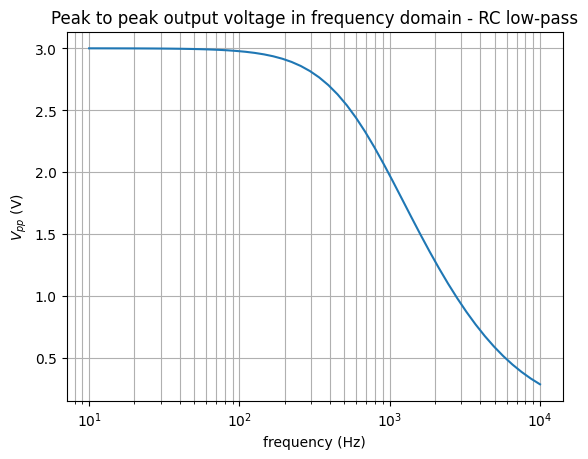

In [12]:
plt.title('Peak to peak output voltage in frequency domain - RC low-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid(which='both')
plt.semilogx(freqpoints,Vfpoints)
plt.savefig('RC-passa-baixa-resp-frequencia.png', format='png')
plt.show()

# RC - Capacitância variante

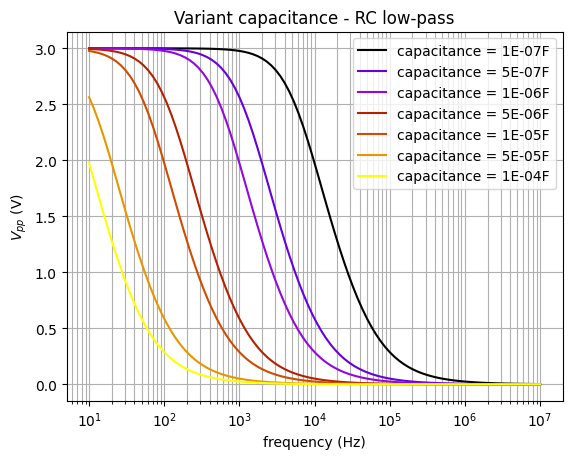

In [15]:
# constantes

Vpp = 3
a = 0    #s
R = 200  #ohms

colors = plt.cm.gnuplot(np.linspace(0, 1, 7))

for C, i in zip([1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4], range(7)):
  freqpoints = np.logspace(1,7,100)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    if C > 1.1e-7:
      N = 1000
    else:
      N = 10000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,RCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.semilogx(freqpoints,Vfpoints,label=f'capacitance = {C:.0E}F', color=colors[i])

plt.title('Variant capacitance - RC low-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid(which='both')
plt.legend()
plt.savefig('RC-passa-baixa-cap-var.png', format='png')
plt.show()

# RC - Resistência variável

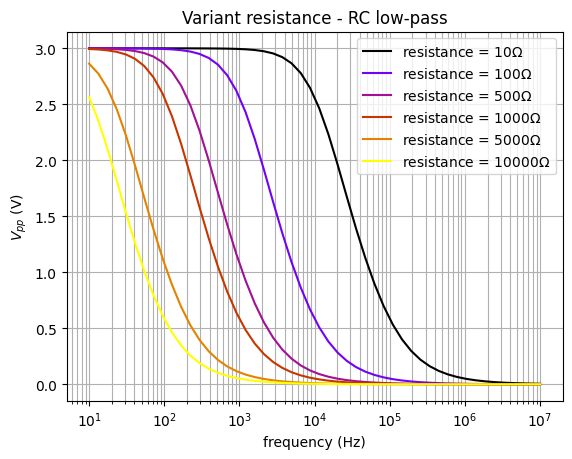

In [14]:
# constantes

Vpp = 3
a = 0    #s
C = 1e-6 #F

colors = plt.cm.gnuplot(np.linspace(0, 1, 6))

for R, i in zip([10, 100, 500, 1000, 5000, 10000], range(6)):
  freqpoints = np.logspace(1,7,50)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    if R < 100:
      N = 10000
    else:
      N = 1000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,RCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.semilogx(freqpoints,Vfpoints,label=f'resistance = {R}$\Omega$', color=colors[i])

plt.title('Variant resistance - RC low-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid(which='both')
plt.legend()
plt.savefig('RC-passa-baixa-res-var.png', format='png')
plt.show()

# RC - Resistência e capacitância variável

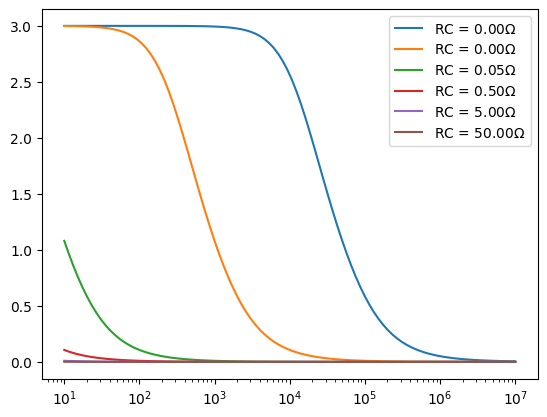

In [ ]:
# constantes

Vpp = 3
a = 0    #s

for R, C in zip([10, 100, 500, 1000, 5000, 10000], [1e-6, 5e-6, 1e-4, 5e-4, 1e-3, 5e-3]):
  freqpoints = np.logspace(1,7,100)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    if R < 100:
      N = 10000
    else:
      N = 1000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,RCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.semilogx(freqpoints,Vfpoints,label=f'RC = {R*C :.2f}$\Omega$')

plt.legend()
plt.show()